# The Geography of Pacific Beach Business

This brief analysis examines the location of businesses in Pacific Beach, a residential neighborhood in San Diego with a very popular entertainment district. 

The City of San Diego has over 50,000 businesses registered to pay the San Diego City business tax. It is difficult to imagine that the city has such a large number of businesses; even a city as diverse as San Diego can't have that many restaurants, nail salons and tatoo parlors. With a little analysis, it quickly becomes apparent that most of these businesses are nearly invisble. They don't have storefronts, and they are located in out-of-the-way places: the geography of business in San Diego has many surprises. In this analysis, we will look specifically at the beach neighbohood of San Diego. 

The data for this analysis comes from several sources. The City of San Diego's [Master Business Listing](https://www.sandiego.gov/treasurer/taxesfees/btax/nblactive) provides the names, address and NAICS codes for all of the businesses. These businesses are then geocoded with Pelias and linked to clusters of [Points of Interest derived from Open Street Map](https://wiki.openstreetmap.org/wiki/Points_of_interest) and Census block groups. These dataset are combined and published in a [datapackage](https://data.sandiegodata.org/dataset/sandiegodata-org-business-clusters/) at the San Diego Regional Data Library. 


In [4]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

import contextily as cx

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()


In [13]:
sd_mbl = pkg.resource('sb_mbl').dataframe()
clusters = pkg.resource('sd_business_clusters').geoframe()
scb = pkg.resource('sd_custered_businesses').geoframe()
scb['cluster_type'] = scb.cluster_type.fillna('NA')
naics = pkg.resource('naics').dataframe()

businesses = scb.merge(naics)

def to_gdf(s, crs):
    return gpd.GeoDataFrame({'geometry': s}, crs=crs)



First, let's look at the locations of all of the businesses in Pacific Beach. The somewhat rectangular outlines are the areas of high-densities of Open Street Map points of interest, for the POIs that are related to entertainment, such as restaurants, bars and cafes. 

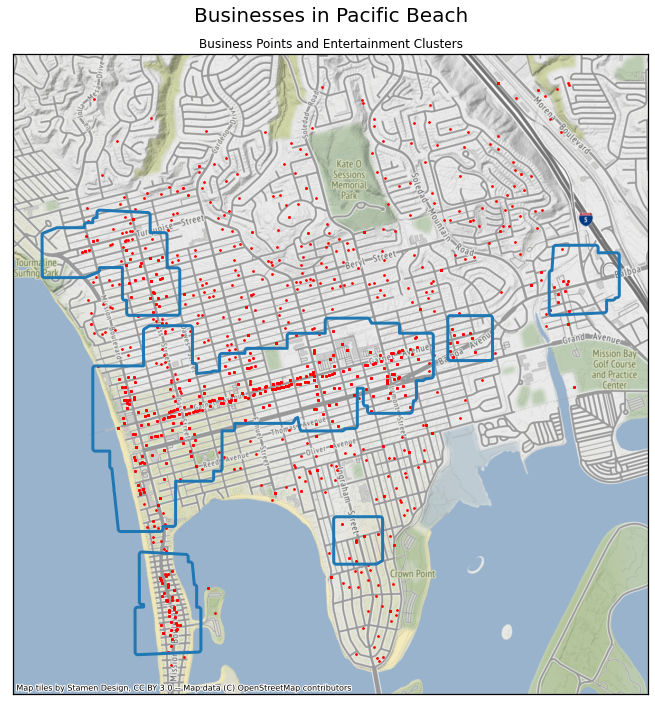

In [5]:

# PB Is also: 
#pb = cx.Place('92109', zoom=14)

pb_clusters = to_gdf(clusters.cx[-117.26:-117.22,32.78:32.82].unary_union, 4326)

fig, ax = plt.subplots(1,1, figsize = (10,10))
fig.suptitle('Businesses in Pacific Beach', fontsize=20)
ax.set_title("Business Points and Entertainment Clusters")
pb_clusters.to_crs(epsg=3857).boundary.plot(ax=ax, linewidth=3)

pb_businesses = scb.cx[-117.26:-117.22,32.78:32.82]
pb_businesses.to_crs(epsg=3857).plot(color="red", markersize=3, ax=ax)
cx.add_basemap(ax)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()

There are two things to notice about this map. First, there is a high density of businesses in the cluster regions (that's why they are clusters!) but second, it looks like a lot of the business ( about 25% ) are not in the clusters. Instead, those businesses are in the residential neighborhoods. Let's look at those businesses in more detail. 

We can examine the types of these businesses through their North American Industry Classification System (NAICS) code. The NAICS codes are heirarchical, so using only the leftmost digits of the code will give you higher level categories, and using more digitis will give you more details. Of the 636 businesses in this area that are not in a cluster, here are the 10 most common types of business, for three digit NAICS codes:

In [21]:
t = gpd.sjoin(pb_businesses, pb_clusters, how='left')
t = t[t.cluster_n==0]
#ax = t.to_crs(epsg=3857).plot(figsize=(9,9))
#cx.add_basemap(ax)
t = t.merge(naics)
t.naics_3_desc.value_counts().to_frame('Number of Businesses').head(11)


,Number of Businesses
"Professional, Scientific, and Technical Services",206
Real Estate,54
Administrative and Support Services,49
Personal and Laundry Services,46
Nonstore Retailers,40
Educational Services,31
"Performing Arts, Spectator Sports, and Related Industries",20
Ambulatory Health Care Services,19
Repair and Maintenance,14
Food Services and Drinking Places,11


The majority of these businesses are consulting firms, real estate agents, personal and business services, and online retailers. These types of firms form a small part of the businesses in Pacific Beach, but they are 62% of all businesses in the City of San Diego. Citywide, the 'Professional, Scientific, and Technical Services' category is 20% of all businesses, the largest category. Of the two 10 types of businesses, only a few of them are ones that would have storefronts you are likely to see driving around. 

In [50]:
#t10naics = t[t.naics_3_desc!='Food Services and Drinking Places'].naics_3.value_counts().to_frame('Number of Businesses').head(10).index
#len(businesses[businesses.naics_3.isin(t10naics)])/len(businesses)
# 0.6164591727195416
#len(businesses[businesses.naics_3_desc== 'Professional, Scientific, and Technical Services'])/len(businesses)

In [51]:

t = businesses.naics_3_desc.value_counts().to_frame('Portion of Businesses (%)')
t = t.divide(len(businesses), axis=1).multiply(100).round(0)
t.head(10)

,Number of Businesses (%)
"Professional, Scientific, and Technical Services",20.0
Personal and Laundry Services,11.0
Food Services and Drinking Places,7.0
Ambulatory Health Care Services,7.0
Administrative and Support Services,6.0
Real Estate,5.0
Repair and Maintenance,3.0
Nonstore Retailers,3.0
Educational Services,3.0
"Religious, Grantmaking, Civic, Professional, and Similar Organizations",3.0


Its very easy to think of businesses in a city as the ones you most frequently see, but most of the registered businesses — by number, not by revenue or number of employees — are very small firms that are operated from a nondescripe office building or the proprietors home. 